<a href="https://colab.research.google.com/github/ghpham25/nlp-learn/blob/main/SurveyResponses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

We assume your data is in Google Drive. If it's not, you can skip this cell. In that case you need to:
1. Upload your data - use the little folder icon to the left in Colab
2. Keep a copy of your data - your data uploaded into Colab does *not* persist when the notebook is shut down

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Raw Data

**Location**:
We assume your data is in Google Drive. Any data you store in Colab *will go away*, so always save a copy in Google Drive or on your computer.

This sample data file I am loading is movie reviews from https://www.cs.cornell.edu/people/pabo/movie-review-data/; specifically, v2.0 of the polarity dataset.

I stored it in the shared Google drive "surveyData" at the top level. If your data is stored elsewhere change the path in rawDataFile.

**Format**:
We assume your data is in tab separated format with one set of responses per line and the open ended responses in particular columns. If it is comma separated, change the delimiter below to ','.

**Texts**:
You will want to modify textColumns to contain the text columns you want to process through this notebook.

In [ ]:
import pandas

# Change this for your data file
rawDataFile = '/content/drive/Shareddrives/surveyData/data.csv'

# Load the data
data = pandas.read_csv(rawDataFile, delimiter='\t', quotechar='\"')

# Which columns contain open ended responses?
textColumns = ['Text']

Let's take a look at the data.

In [ ]:
data.head(10)

,File,Class,Text
0,txt_sentoken/neg/cv216_20165.txt,neg,"as far as ' mystery men ' is concerned , the b..."
1,txt_sentoken/neg/cv393_29234.txt,neg,"not so long ago , men by the names of peckinpa..."
2,txt_sentoken/neg/cv815_23466.txt,neg,when i watch a movie like mike nichols' what p...
3,txt_sentoken/neg/cv366_10709.txt,neg,synopsis : the president of a company wants to...
4,txt_sentoken/neg/cv518_14798.txt,neg,"well , as i check my score card for what i've ..."
5,txt_sentoken/neg/cv018_21672.txt,neg,the law of crowd pleasing romantic movies stat...
6,txt_sentoken/neg/cv658_11186.txt,neg,senseless is a prime example of what can happe...
7,txt_sentoken/neg/cv795_10291.txt,neg,"mr . bean , a bumbling security guard from eng..."
8,txt_sentoken/neg/cv396_19127.txt,neg,adam sandler isn't known for appearing in deep...
9,txt_sentoken/neg/cv726_4365.txt,neg,cashing in on the success of white men can't j...


# Preprocess the Data

## Truecase

Sometimes survey responses come iRRegulArly cased, and NLP works better if everything is properly cased. Let's fix the responses!

First, we install a "true caser" (code and model).

In [ ]:
!pip install truecase
!python -m nltk.downloader punkt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 44.7 MB/s eta 0:00:00
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Let's truecase!

This cell may take some time. However, at the end it writes over your data file so (if you download the output) you only have to run it once.

In [ ]:
import truecase

dataFile = '/content/drive/Shareddrives/surveyData/casedData.csv'
data[textColumns] = data[textColumns].applymap(truecase.get_true_case)
data.to_csv(dataFile)

Let's take a look at our data after true casing.

In [ ]:
data.head(10)

data = data.head(20)
data

,File,Class,Text
0,txt_sentoken/neg/cv216_20165.txt,neg,"As far as' mystery men' is concerned, the burn..."
1,txt_sentoken/neg/cv393_29234.txt,neg,"Not so long ago, men by the names of Peckinpah..."
2,txt_sentoken/neg/cv815_23466.txt,neg,When I watch a movie like Mike Nichols' what p...
3,txt_sentoken/neg/cv366_10709.txt,neg,Synopsis: the President of a company wants to ...
4,txt_sentoken/neg/cv518_14798.txt,neg,"Well, as I check my score card for what I've d..."
5,txt_sentoken/neg/cv018_21672.txt,neg,The law of crowd pleasing romantic movies Stat...
6,txt_sentoken/neg/cv658_11186.txt,neg,Senseless is a prime example of what can happe...
7,txt_sentoken/neg/cv795_10291.txt,neg,"Mr . Bean, a Bumbling security guard from Engl..."
8,txt_sentoken/neg/cv396_19127.txt,neg,Adam Sandler isn't known for appearing in deep...
9,txt_sentoken/neg/cv726_4365.txt,neg,Cashing in on the success of white men can't j...


# Do NLP on the Data

## Set up

We will use spaCy (https://spacy.io/), a well known NLP library. We will use its en_core_web_lg model.

We will also use BERTopic (https://maartengr.github.io/BERTopic/index.html#installation).

And finally, we will use the huggingface transformers library (https://huggingface.co/docs/transformers/index).

We need to install and download the code and models.

This cell may take some time.

In [ ]:
# for everything but sentiment
!pip install spacy

!python -m spacy download en_core_web_lg

# for sentiment
!pip install spacytextblob

!python -m textblob.download_corpora

# for keyphrases
!pip install pyate

# for topics
!pip install bertopic[spacy]

2023-07-25 13:29:25.383290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 13:29:27.282297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-25 13:29:28.697994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-25 13:29:28.698570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

We create a spaCy "engine" and add to it the extra NLP that we want to do.

In [ ]:
# import packages
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pyate
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

# make a NLP "engine" and add sentiment and key phrase extraction
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe('spacytextblob')
nlp.add_pipe("combo_basic")

# topic model using transformers
topic_model = BERTopic(representation_model=KeyBERTInspired())

## Specify Patterns

If you know the themes ("topics") you want to find in your data, you should define each of them using a set of keywords.

The data structure we do this in is called a *dictionary*. Each row has a key (in quotes) followed by : then a list of strings (single or multi-word terms).

If you don't already have a set of themes, you can skip this section.

In [ ]:
phrases = {
    'ROLE': ['actor', 'director', 'actors', 'producer'],
    'GENRE': ['horror', 'drama', 'comedy', 'romcom', 'animated', 'romantic comedy']
}


Let's add those patterns to spaCy.

In [ ]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

for key in phrases:
  patterns = [nlp.make_doc(text) for text in phrases[key]]
  matcher.add(key.upper(), patterns)

## Process the Individual Responses

First we (re)load the cased data.

In [ ]:
# Change this for your data file
dataFile = '/content/drive/Shareddrives/surveyData/casedData.csv'

# Which columns contain open ended responses?
textColumns = ['Text']

# Load the data
data = pandas.read_csv(dataFile, delimiter=',')

Here we convert each response into a spacy document, then we run each response through a bunch of spacy NLP components and models, including:
1. tokenization - find sentences and words
2. named entity recognition - find mentions of names of people, organizations, locations etc
3. key phrase extraction, unsupervised - identify important phrases in each response, unsupervised
4. theme extraction, supervised - identify important phrases in each response, using patterns you provided
5. sentiment - for each response, and for each sentence in each response

This cell will take a long time.

In [ ]:
topics = {}

for column in textColumns:
  # process the texts in the column
  docs = list(nlp.pipe(data[column]))
  # extract the sentences, as a list
  data[column + '_sentences'] = [[x.text for x in doc.sents] for doc in docs]
  data[column + '_sentence_counts'] = [len(list(doc.sents)) for doc in docs]
  # extract the words ("tokens"), as a list
  data[column + '_words'] = [[x.text for x in doc] for doc in docs]
  data[column + '_word_counts'] = [len(list(doc)) for doc in docs]
  # extract the content words ("tokens"), as a list
  data[column + '_content_words'] = [[x.text for x in doc if x.pos_ in ['NOUN', 'PROPN', 'VERB', 'ADJ', 'ADV']] for doc in docs]
  data[column + '_content_word_counts'] = [len(list(doc)) for doc in docs]
  # extract the entities, as a list
  data[column + '_entities'] = [[x.text for x in doc.ents] for doc in docs]
  data[column + '_entity_counts'] = [len(list(doc.ents)) for doc in docs]
  # extract noun phrase chunks, as a list
  data[column + '_noun_chunks'] = [[x.text for x in doc.noun_chunks] for doc in docs]
  data[column + '_noun_chunk_counts'] = [len(list(doc.noun_chunks)) for doc in docs]
  # extract any keyphrases from the whole response
  data[column + '_keyphrases'] = [list(doc._.combo_basic.sort_values(ascending=False).keys()) for doc in docs]
  data[column + '_keyphrase_counts'] = [doc._.combo_basic.sort_values(ascending=False).size for doc in docs]
  # extract the matched key phrases, as a list
  data[column + '_phrase_matches'] = [[str(doc[start:end]) + '#' + nlp.vocab.strings[match_id] for match_id, start, end in matcher(doc)] for doc in docs]
  data[column + '_phrase_match_counts'] = [len(list(matcher(doc))) for doc in docs]
  # extract the sentiment polarity and subjectivity scores. Polarity goes from -1 to 1 (negative to positive), subjectivity from 0 to 1.
  data[column + '_sentiment_score'] = [doc._.blob.polarity for doc in docs]
  data[column + '_sentiment'] = ['neg' if doc._.blob.polarity < -.2 else 'pos' if doc._.blob.polarity > .2 else 'neu' for doc in docs]
  data[column + '_subjectivity'] = [doc._.blob.subjectivity for doc in docs]
  data[column + '_sentiment_evidence'] = [doc._.blob.sentiment_assessments.assessments for doc in docs]
  # extract the topics
  topics[column], _ = topic_model.fit_transform(data[column])
  data[column + '_topic_id'] = topic_model.get_document_info(data[column])['Topic']
  data[column + '_topic_name'] = topic_model.get_document_info(data[column])['Name']
  data[column + '_topic_representation'] = topic_model.get_document_info(data[column])['Representation']

# save it!
dataFile = '/content/drive/Shareddrives/surveyData/processedData.csv'
data.to_csv(dataFile)


Let's take a look at our data now.

In [ ]:
data.head(10)

,Unnamed: 0,File,Class,Text,Text_sentences,Text_sentence_counts,Text_words,Text_word_counts,Text_content_words,Text_content_word_counts,...,Text_keyphrase_counts,Text_phrase_matches,Text_phrase_match_counts,Text_sentiment_score,Text_sentiment,Text_subjectivity,Text_sentiment_evidence,Text_topic_id,Text_topic_name,Text_topic_representation
0,0,txt_sentoken/neg/cv216_20165.txt,neg,"As far as' mystery men' is concerned, the burn...","[As far as' mystery men' is concerned, the bur...",16,"[As, far, as, ', mystery, men, ', is, concerne...",366,"[As, far, mystery, men, concerned, burning, qu...",366,...,36,"[director#ROLE, actors#ROLE]",2,0.163713,neu,0.538845,"[([far], 0.1, 1.0, None), ([less], -0.16666666...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
1,1,txt_sentoken/neg/cv393_29234.txt,neg,"Not so long ago, men by the names of Peckinpah...","[Not so long ago, men by the names of Peckinpa...",23,"[Not, so, long, ago, ,, men, by, the, names, o...",565,"[so, long, ago, men, names, Peckinpah, Ford, L...",565,...,67,[producer#ROLE],1,0.001001,neu,0.419654,"[([long], -0.05, 0.4, None), ([real], 0.2, 0.3...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
2,2,txt_sentoken/neg/cv815_23466.txt,neg,When I watch a movie like Mike Nichols' what p...,[When I watch a movie like Mike Nichols' what ...,72,"[When, I, watch, a, movie, like, Mike, Nichols...",1433,"[watch, movie, Mike, Nichols, planet, help, fe...",1433,...,106,"[comedy#GENRE, comedy#GENRE]",2,0.092461,neu,0.552190,"[([back], 0.0, 0.0, None), ([quietly], 0.0, 0....",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
3,3,txt_sentoken/neg/cv366_10709.txt,neg,Synopsis: the President of a company wants to ...,[Synopsis: the President of a company wants to...,25,"[Synopsis, :, the, President, of, a, company, ...",656,"[Synopsis, President, company, wants, test, se...",656,...,62,[actors#ROLE],1,0.072513,neu,0.575082,"[([wants], 0.2, 0.1, None), ([psychotic], -0.5...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
4,4,txt_sentoken/neg/cv518_14798.txt,neg,"Well, as I check my score card for what I've d...","[Well, as I check my score card for what I've ...",29,"[Well, ,, as, I, check, my, score, card, for, ...",616,"[check, score, card, done, holiday, weekend, r...",616,...,83,[actors#ROLE],1,0.090093,neu,0.541178,"[([good], 0.7, 0.6000000000000001, None), ([du...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
5,5,txt_sentoken/neg/cv018_21672.txt,neg,The law of crowd pleasing romantic movies Stat...,[The law of crowd pleasing romantic movies Sta...,27,"[The, law, of, crowd, pleasing, romantic, movi...",524,"[law, crowd, pleasing, romantic, movies, State...",524,...,71,"[comedy#GENRE, comedy#GENRE, comedy#GENRE]",3,0.069018,neu,0.449188,"[([romantic], 0.0, 0.5, None), ([not, familiar...",0,0_movie_films_film_comedy,"[movie, films, film, comedy, romantic, too, he..."
6,6,txt_sentoken/neg/cv658_11186.txt,neg,Senseless is a prime example of what can happe...,[Senseless is a prime example of what can happ...,26,"[Senseless, is, a, prime, example, of, what, c...",551,"[Senseless, prime, example, happen, try, push,...",551,...,60,"[director#ROLE, comedy#GENRE]",2,0.108586,neu,0.555308,"[([far], 0.1, 1.0, None), ([such], 0.0, 0.5, N...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
7,7,txt_sentoken/neg/cv795_10291.txt,neg,"Mr . Bean, a Bumbling security guard from Engl...","[Mr ., Bean, a Bumbling security guard from En...",32,"[Mr, ., Bean, ,, a, Bumbling, security, guard,...",634,"[Mr, Bean, Bumbling, security, guard, England,...",634,...,63,"[comedy#GENRE, actors#ROLE, actor#ROLE]",3,0.047040,neu,0.421730,"[([american], 0.0, 0.0, None), ([first], 0.25,...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
8,8,txt_sentoken/neg/cv396_19127.txt,neg,Adam Sandler is

# Visualize and Summarize

Load the data!

In [ ]:
from ast import literal_eval
import pandas

# Change this for your data file
dataFile = '/content/drive/Shareddrives/surveyData/processedData.csv'

# Which columns contain open ended responses?
textColumns = ['Text']
converterDict = {}
for column in textColumns:
  for annotation in ['_sentences', '_words', '_content_words', '_entities', '_noun_chunks', '_keyphrases', '_phrase_matches', '_sentiment_evidence', '_topic_representation']:
    converterDict[column + annotation] = literal_eval

# Load the data
data = pandas.read_csv(dataFile, delimiter=',', converters=converterDict)

# Which columns contain open ended responses?
textColumns = ['Text']

In [ ]:
data.head(10)

,Unnamed: 0.1,Unnamed: 0,File,Class,Text,Text_sentences,Text_sentence_counts,Text_words,Text_word_counts,Text_content_words,...,Text_keyphrase_counts,Text_phrase_matches,Text_phrase_match_counts,Text_sentiment_score,Text_sentiment,Text_subjectivity,Text_sentiment_evidence,Text_topic_id,Text_topic_name,Text_topic_representation
0,0,0,txt_sentoken/neg/cv216_20165.txt,neg,"As far as' mystery men' is concerned, the burn...","[As far as' mystery men' is concerned, the bur...",16,"[As, far, as, ', mystery, men, ', is, concerne...",366,"[As, far, mystery, men, concerned, burning, qu...",...,36,"[director#ROLE, actors#ROLE]",2,0.163713,neu,0.538845,"[([far], 0.1, 1.0, None), ([less], -0.16666666...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
1,1,1,txt_sentoken/neg/cv393_29234.txt,neg,"Not so long ago, men by the names of Peckinpah...","[Not so long ago, men by the names of Peckinpa...",23,"[Not, so, long, ago, ,, men, by, the, names, o...",565,"[so, long, ago, men, names, Peckinpah, Ford, L...",...,67,[producer#ROLE],1,0.001001,neu,0.419654,"[([long], -0.05, 0.4, None), ([real], 0.2, 0.3...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
2,2,2,txt_sentoken/neg/cv815_23466.txt,neg,When I watch a movie like Mike Nichols' what p...,[When I watch a movie like Mike Nichols' what ...,72,"[When, I, watch, a, movie, like, Mike, Nichols...",1433,"[watch, movie, Mike, Nichols, planet, help, fe...",...,106,"[comedy#GENRE, comedy#GENRE]",2,0.092461,neu,0.552190,"[([back], 0.0, 0.0, None), ([quietly], 0.0, 0....",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
3,3,3,txt_sentoken/neg/cv366_10709.txt,neg,Synopsis: the President of a company wants to ...,[Synopsis: the President of a company wants to...,25,"[Synopsis, :, the, President, of, a, company, ...",656,"[Synopsis, President, company, wants, test, se...",...,62,[actors#ROLE],1,0.072513,neu,0.575082,"[([wants], 0.2, 0.1, None), ([psychotic], -0.5...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
4,4,4,txt_sentoken/neg/cv518_14798.txt,neg,"Well, as I check my score card for what I've d...","[Well, as I check my score card for what I've ...",29,"[Well, ,, as, I, check, my, score, card, for, ...",616,"[check, score, card, done, holiday, weekend, r...",...,83,[actors#ROLE],1,0.090093,neu,0.541178,"[([good], 0.7, 0.6000000000000001, None), ([du...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
5,5,5,txt_sentoken/neg/cv018_21672.txt,neg,The law of crowd pleasing romantic movies Stat...,[The law of crowd pleasing romantic movies Sta...,27,"[The, law, of, crowd, pleasing, romantic, movi...",524,"[law, crowd, pleasing, romantic, movies, State...",...,71,"[comedy#GENRE, comedy#GENRE, comedy#GENRE]",3,0.069018,neu,0.449188,"[([romantic], 0.0, 0.5, None), ([not, familiar...",0,0_movie_films_film_comedy,"[movie, films, film, comedy, romantic, too, he..."
6,6,6,txt_sentoken/neg/cv658_11186.txt,neg,Senseless is a prime example of what can happe...,[Senseless is a prime example of what can happ...,26,"[Senseless, is, a, prime, example, of, what, c...",551,"[Senseless, prime, example, happen, try, push,...",...,60,"[director#ROLE, comedy#GENRE]",2,0.108586,neu,0.555308,"[([far], 0.1, 1.0, None), ([such], 0.0, 0.5, N...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
7,7,7,txt_sentoken/neg/cv795_10291.txt,neg,"Mr . Bean, a Bumbling security guard from Engl...","[Mr ., Bean, a Bumbling security guard from En...",32,"[Mr, ., Bean, ,, a, Bumbling, security, guard,...",634,"[Mr, Bean, Bumbling, security, guard, England,...",...,63,"[comedy#GENRE, actors#ROLE, actor#ROLE]",3,0.047040,neu,0.421730,"[([american], 0.0, 0.0, None), ([first], 0.25,...",-1,-1_film_movie_scene_films,"[film, movie, scene, films, very, characters, ..."
8,8,8,txt_sentoken/neg/cv396_19127.txt,neg,Adam Sandler isn't known for appearing in 

Summarize and visualize!

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topics = {}

def summarize(group, data, textColumns, outputDirectory, topn=20):
  group = ' '.join([str(x) for x in group])
  # get number of responses
  with open(outputDirectory + group + '_basicStats.txt', 'w') as f:
    print('The ' + group + ' dataframe has ' + str(len(data)) + ' rows.\n')
    f.write('The ' + group + ' dataframe has ' + str(len(data)) + ' rows.\n')

    # get number of responses that contain at least one noun phrase (~ 'substantive')
    for column in textColumns:
      f.write('The ' + group + ' dataframe has ' + str(len(data[data[column + '_noun_chunk_counts'] > 0])) + ' substantive rows for column ' + column + '.\n')
      # make word clouds from content words, named entities and noun chunks
      for annotation in ['_content_words', '_entities', '_noun_chunks', '_keyphrases']:
        try:
          # create a word cloud
          cloudDict=Counter(data[column + annotation].explode().tolist())
          cloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(cloudDict)
          cloud.to_file(outputDirectory + group + '_' + column + annotation + '_cloud.png')
          # create histogram of top 20 items
          cloudDictTop = cloudDict.most_common(topn)
          plt.bar([x[0] for x in cloudDictTop], [x[1] for x in cloudDictTop])
          plt.xticks(rotation='vertical')
          plt.savefig(outputDirectory + group + '_' + column + annotation + '_hist.png')
        except Exception as e:
          print('Could not generate word clouds for ', column, annotation, ' because of an exception: ', e)
      try:
        # create a visualizaiton of the topic model for this group
        topics[column], _ = topic_model.fit_transform(data[column])
        fig = topics[column].visualize_topics()
        plt.savefig(outputDirectory + group + '_' + column + '_topic.png')
      except Exception as e:
        print('Did not create a topic model for ', group, ' because of an exception: ', e)
      # create a text summary for this group
      # tbd!!


Here we do things on the whole set of responses, grouping them and then providing:
* Basic statistics - number of responses, number of substantive responses, and word clouds of named entities, key phrases, and noun chunks for each group
* A topic visualization for each group
* A text summary for each group

We group responses by sentiment and topic, but you may want to group your responses by other category/ies. Just specify the columns in groupbyColumns.

All the outputs and visualizations get saved in outputDirectory; to change this destination, modify the path.

(Note: I found this very useful resource here: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)

The neg -1 dataframe has 1 rows.

Did not create a topic model for  neg -1  because of an exception:  Transform unavailable when model was fit with only a single data sample.
The neg 4 dataframe has 2 rows.

Did not create a topic model for  neg 4  because of an exception:  zero-size array to reduction operation maximum which has no identity
The neg 8 dataframe has 1 rows.

Did not create a topic model for  neg 8  because of an exception:  Transform unavailable when model was fit with only a single data sample.
The neu -1 dataframe has 897 rows.

Did not create a topic model for  neu -1  because of an exception:  'list' object has no attribute 'visualize_topics'
The neu 0 dataframe has 117 rows.

Did not create a topic model for  neu 0  because of an exception:  'list' object has no attribute 'visualize_topics'
The neu 1 dataframe has 84 rows.

Did not create a topic model for  neu 1  because of an exception:  'list' object has no attribute 'visualize_topics'
The neu 2 dataframe has 52

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


Did not create a topic model for  pos 3  because of an exception:  Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.
The pos 5 dataframe has 1 rows.

Did not create a topic model for  pos 5  because of an exception:  Transform unavailable when model was fit with only a single data sample.
The pos 6 dataframe has 2 rows.

Did not create a topic model for  pos 6  because of an exception:  zero-size array to reduction operation maximum which has no identity
The pos 8 dataframe has 2 rows.

Did not create a topic model for  pos 8  because of an exception:  zero-size array to reduction operation maximum which has no identity
The pos 11 dataframe has 1 rows.

Did not create a topic model for  pos 11  because of an exception:  Transform unavailable when model was fit with only a single data sample.
The pos 13 dataframe has 1 rows.

Did not create a topic model for  pos 13  because of an exception:  Transform unavailable when model was fit w

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


Did not create a topic model for  pos 17  because of an exception:  Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.
The pos 18 dataframe has 1 rows.

Did not create a topic model for  pos 18  because of an exception:  Transform unavailable when model was fit with only a single data sample.
The pos 19 dataframe has 1 rows.

Did not create a topic model for  pos 19  because of an exception:  Transform unavailable when model was fit with only a single data sample.
The pos 20 dataframe has 5 rows.



/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


Did not create a topic model for  pos 20  because of an exception:  Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.
The pos 21 dataframe has 7 rows.

Did not create a topic model for  pos 21  because of an exception:  k must be less than or equal to the number of training points
The pos 22 dataframe has 2 rows.

Did not create a topic model for  pos 22  because of an exception:  zero-size array to reduction operation maximum which has no identity
The pos 23 dataframe has 1 rows.

Did not create a topic model for  pos 23  because of an exception:  Transform unavailable when model was fit with only a single data sample.
The pos 25 dataframe has 2 rows.

Did not create a topic model for  pos 25  because of an exception:  zero-size array to reduction operation maximum which has no identity
The pos 26 dataframe has 1 rows.

Did not create a topic model for  pos 26  because of an exception:  Transform unavailable when model was fit with 

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


Did not create a topic model for  pos 30  because of an exception:  Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.
The pos 32 dataframe has 1 rows.

Did not create a topic model for  pos 32  because of an exception:  Transform unavailable when model was fit with only a single data sample.


""


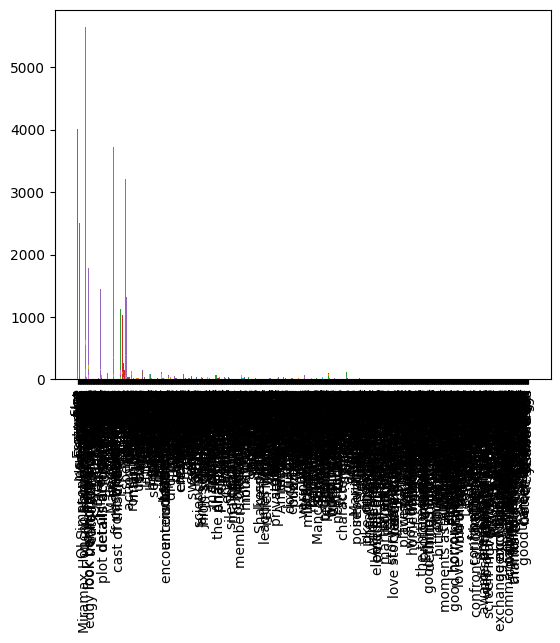

In [ ]:
# summarize by sentiment and topic
groupbyColumns = []
groupbyColumns.extend([column + "_sentiment" for column in textColumns])
groupbyColumns.extend([column + "_topic_id" for column in textColumns])

outputDirectory = '/content/drive/Shareddrives/surveyData/'

grouped = data.groupby(groupbyColumns, group_keys=True)
grouped.apply(lambda x: summarize(x.name, x, textColumns, outputDirectory, topn=10))
